In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pyemma
from pyemma.util.contexts import settings
# for visualization of molecular structures:
import nglview
import mdtraj

_ColormakerRegistry()

In [19]:
name = 'ADP4_500ns_100ps'
pdb = name + '.pdb' #string for pdb directory
files = [name + '.xtc'] #string for xtc trajectory directory, multipe trajectories can be passed

In [20]:
torsions_feat = pyemma.coordinates.featurizer(pdb) # determines features/topology of peptide
torsions_feat.add_backbone_torsions(cossin=True, periodic=False) # adds the sine and cosine transformed torsions to feature
torsions_data = pyemma.coordinates.load(files, features=torsions_feat) # pulls specific features from trajectory
labels = ['backbone\ntorsions']

In [21]:
tica = pyemma.coordinates.tica(torsions_data, lag=10) # perfrom tICA, lag is step size, depends on the timestep in sim
tica_output = tica.get_output() # puts tICA output in an array
tica_concatenated = np.concatenate(tica_output) # concatenating for viusalization purpases

In [7]:
print(len(torsions_data[0]))


84


In [22]:
from scipy.stats import pearsonr # determines correlation between the independent components (tICA) to the phi/psi torsions
torsions_feature_TIC_correlation = np.zeros((torsions_feat.dimension(), tica.dimension()))

for i in range(torsions_feat.dimension()):
    for j in range(tica.dimension()):
        torsions_feature_TIC_correlation[i, j] = pearsonr(
            torsions_data[:, i],
            tica_concatenated[:, j])[0]

In [9]:
print(np.amin(torsions_feature_TIC_correlation))
print(np.amax(torsions_feature_TIC_correlation))

-0.9339014319199095
0.9454006722008264


In [10]:
abs(torsions_feature_TIC_correlation).max()

0.9454006722008264

In [11]:
len(torsions_feature_TIC_correlation)

84

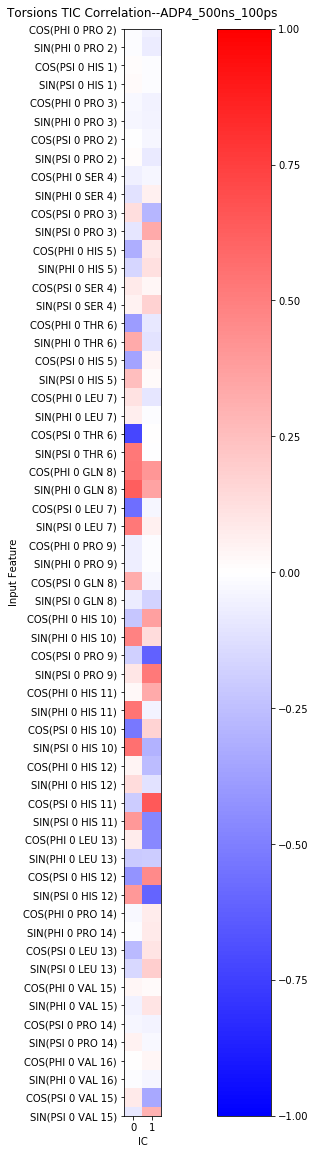

In [23]:
vm = abs(torsions_feature_TIC_correlation).max() # generating a heatmap

fig, ax = plt.subplots(figsize=(20, 20))
i = ax.imshow(torsions_feature_TIC_correlation[:,:2], vmin=-1, vmax=1, cmap='bwr')

ax.set_xticks(range(2))
ax.set_xlabel('IC')

ax.set_yticks(range(torsions_feat.dimension()))
ax.set_yticklabels(torsions_feat.describe())
ax.set_ylabel('Input Feature')
plt.title('Torsions TIC Correlation--' + name, pad = 12)

fig.colorbar(i);
fig.savefig(name + '_torsions_TIC_correlation.png')

In [13]:
max_index = torsions_feature_TIC_correlation.argmax()
max_indexes_list = []
for i in range(len(torsions_feature_TIC_correlation)):
    max_val_index = torsions_feature_TIC_correlation.argmax(axis = i)
    max_indexes_list.append(max_val_index)
max_indexes_list
    
    

AxisError: axis 2 is out of bounds for array of dimension 2

This is a test. Without taking the cosine and sines of each phi and psi angles

In [7]:
feat_test = pyemma.coordinates.featurizer(pdb) # generating features for to compare to tICA
feat_test.add_backbone_torsions(periodic=False) # pulling the phi and psi angles (no transformation)
data_test = pyemma.coordinates.load(files, features=feat_test) # extracts phi psi from trajectory
data_test_concatenated = np.concatenate(data_test) 

In [20]:
data_test_concatenated
print(len(data_test_concatenated))


150000


In [22]:
print(len(tica_concatenated[0]))

15


In [24]:
from scipy.stats import pearsonr # determines correlation between the independent components (tICA) to the phi/psi torsions
test_feature_TIC_correlation = np.zeros((feat_test.dimension(), tica.dimension()))

for i in range(feat_test.dimension()):
    for j in range(tica.dimension()):
        test_feature_TIC_correlation[i, j] = pearsonr(
            data_test_concatenated[:, i],
            tica_concatenated[:, j])[0]

IndexError: too many indices for array

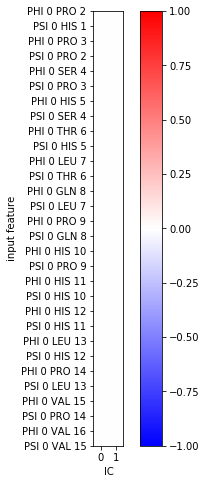

In [25]:
vm = abs(test_feature_TIC_correlation).max() # generating a heatmap

fig, ax = plt.subplots(figsize=(6, 8))
i = ax.imshow(test_feature_TIC_correlation[:,:2], vmin=-1, vmax=1, cmap='bwr')

ax.set_xticks(range(2))
ax.set_xlabel('IC')

ax.set_yticks(range(feat_test.dimension()))
ax.set_yticklabels(feat_test.describe())
ax.set_ylabel('input feature')

fig.colorbar(i);